## Variational inference for DPGMM w/ distinct covariance matrices

reference: https://gl.shtr.io/keenanh/scikit-learn/-/blob/769714e9ead4edd09134506fd80ef010862812d1/doc/modules/dp-derivation.rst

$$
\textbf{<Full Model>} \\[10pt]
\begin{array}{rcl}
\phi_k   &\sim& Beta(1, \alpha_1) \\
\mu_k   &\sim& Normal(0,  \mathbf{I}) \\
\Sigma_k &\sim& Wishart(D, \mathbf{I}) \\
z_{i}     &\sim& SBP(\phi) \\
X_t &\sim& Normal(\mu_{z_i},  \Sigma_{z,i}^{-1})
\end{array}
$$

$$
\textbf{<Variational Distribution>} \\[10pt]
\begin{array}{rcl}
\phi_k   &\sim& Beta(\gamma_{k,1}, \gamma_{k,2}) \\
\mu_k   &\sim& Normal(\nu_{\mu_k},  \mathbf{I}) \\
\Sigma_k &\sim& Wishart(a_k, \mathbf{B_k}) \\
z_{i}     &\sim& Discrete(\nu_{z_i}) \\
\end{array}
$$

$$
\textbf{<ELBO>} \\[10pt]
\begin{array}{rcl}
\log P(X) &\ge&
\sum_k (E_q[\log P(\phi_k)] - E_q[\log Q(\phi_k)]) \\[5pt]
&&
+\sum_k \left( E_q[\log P(\mu_k)] - E_q[\log Q(\mu_k)] \right) \\[5pt]
&&
+\sum_k \left( E_q[\log P(\Sigma_k)] - E_q[\log Q(\Sigma_k)] \right) \\[5pt]
&&
+\sum_i \left( E_q[\log P(z_i)] - E_q[\log Q(z_i)] \right) \\[5pt]
&&
+\sum_i E_q[\log P(X_t)]
\end{array}
$$

$$
\mathbf{<\phi_k>} \\[10pt]
\begin{array}{rcl}
E_q[\log P(\phi_k)] - E_q[\log Q(\phi_k)]
&=&
\log \Gamma(1+\alpha) - \log \Gamma(\alpha) \\[5pt] &&
+(\alpha-1)(\Psi(\gamma_{k,2})-\Psi(\gamma_{k,1}+\gamma_{k,2})) \\[5pt] &&
- \log \Gamma(\gamma_{k,1}+\gamma_{k,2}) + \log \Gamma(\gamma_{k,1}) +
\log \Gamma(\gamma_{k,2}) \\[5pt] &&
-
(\gamma_{k,1}-1)(\Psi(\gamma_{k,1})-\Psi(\gamma_{k,1}+\gamma_{k,2}))
\\[5pt] &&
-
(\gamma_{k,2}-1)(\Psi(\gamma_{k,2})-\Psi(\gamma_{k,1}+\gamma_{k,2}))
\end{array}
$$

$$
\mathbf{<\mu_k>} \\[10pt]
\begin{array}{rcl}
E_q[\log P(\mu_k)] - E_q[\log Q(\mu_k)] &= \int\!d\mu_f q(\mu_f) \log P(\mu_f) - \int\!d\mu_f q(\mu_f) \log Q(\mu_f)  \\[10pt]
&= - \frac{D}{2}\log 2\pi - \frac{1}{2} ||\nu_{\mu_k}||^2 - \frac{D}{2} + \frac{D}{2} \log 2\pi e
\end{array}
$$

$$
\mathbf{<\Sigma_k>} \\[10pt]
\begin{aligned}
E_q[\log P(\Sigma_k)] - E_q[\log Q(\Sigma_k)] &= \frac{D^2}{2}\log 2  + \sum_d \log \Gamma(\frac{D+1-d}{2}) \\[5pt]
&\quad- \frac{aD}{2}\log 2 + \frac{a}{2} \log |\mathbf{B}| + \sum_d \log \Gamma(\frac{a+1-d}{2}) \\[5pt]
&\quad+ \frac{a-D}{2}\left(\sum_d \Psi\left(\frac{a+1-d}{2}\right) + D \log 2 + \log |\mathbf{B}|\right) \\[5pt]
&\quad+ \frac{1}{2} a \mathbf{tr}[\mathbf{B}-\mathbf{I}]
\end{aligned}
$$

$$
\mathbf{<z>} \\[10pt]
\begin{array}{rcl}
E_q[\log P(z)] - E_q[\log Q(z)] = 
\sum_{k} \left(
     \left(\sum_{j=k+1}^K  \nu_{z_{i,j}}\right)(\Psi(\gamma_{k,1})-\Psi(\gamma_{k,1}+\gamma_{k,2}))
 +  \nu_{z_{i,k}}(\Psi(\gamma_{k,1})-\Psi(\gamma_{k,1}+\gamma_{k,2}))
 - \log \nu_{z_{i,k}} \right)
\end{array}
$$

$$
\mathbf{<X_i>} \\[10pt]
\begin{array}{rcl}
E_q[\log P(X_i)] &=& \sum_k \nu_{z_k} \Big( - \frac{D}{2}\log 2\pi
+\frac{1}{2}\left(\sum_d \Psi\left(\frac{a+1-d}{2}\right)
+ D \log 2 + \log |\mathbf{B}|\right) \\[5pt]
&&
-\frac{1}{2}((X_i - \nu_{\mu_k})a\mathbf{B}(X_i - \nu_{\mu_k})+ a\mathbf{tr}(\mathbf{B}))- \log 2 \pi e  \Big)
\end{array}
$$

$$
\textbf{<Updates>} \\[10pt]
\begin{aligned}
\gamma_{k,1} &= 1+\sum_i \nu_{z_{i,k}} \\[5pt]
\gamma_{k,2} &= \alpha + \sum_i \sum_{j > k} \nu_{z_{i,j}} \\[20pt]
\nu_{\mu_k} &= \left(\mathbf{I}+ a_k\mathbf{B_k}\sum_i \nu_{z_{i,k}}\right)^{-1} \left(a_k\mathbf{B_k}\sum_i \nu_{z_{i,k}} X_i\right) \\[20pt]
a_k &= 2 + D + \sum_i \nu_{z_{i,k}} \\
b_k &= 1 + \frac{1}{2}\sum_i \nu_{z_{i,k}} (||X_i-\mu_k||^2 + D)
\end{aligned}
$$

$$
\log \nu_{z_{i,k}} \propto \Psi(\gamma_{k,1}) -
\Psi(\gamma_{k,1} + \gamma_{k,2}) + E_Q[\log P(X_i|z_i=k)] +
\sum_{j < k} \left (\Psi(\gamma_{j,2}) -
\Psi(\gamma_{j,1}+\gamma_{j,2})\right)
$$

$$
\mathbf{B} = \left(\left(\sum_i\nu_{z_{i,k}}+1\right)\mathbf{I} + \sum_i  \nu_{z_{i,k}}(X_i-\nu_{\mu_k})(X_i-\nu_{\mu_k})^T\right)^{-1}
$$

(398, 2)


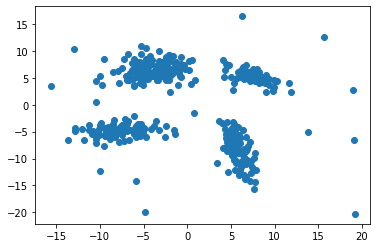

,0,1
0,5.633973,-8.394019
1,5.052455,-7.521087
2,9.051678,2.460117
3,9.948396,4.685057
4,-1.312500,7.318207


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')


# Example data
data = pd.read_csv("./example_data.csv")
print(data.shape)
plt.scatter(data["0"], data["1"])
plt.show()

data.head()

# Variational Inference

  0%|          | 0/200 [00:00<?, ?it/s]

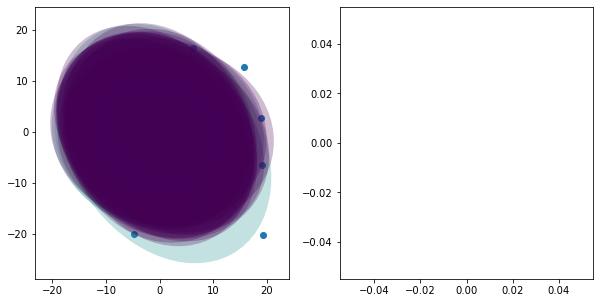

Converged


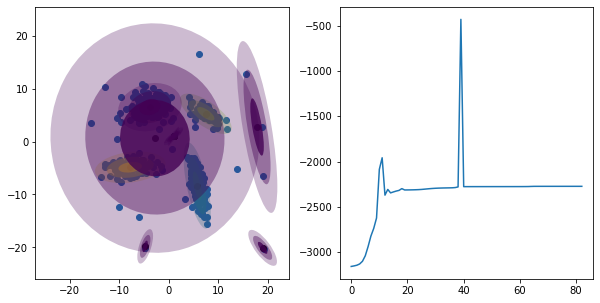

In [265]:
from dpgmmvi import *

MU, INVCOV, PI = fit_transform(data=np.array(data.T), dimensionality=2, n_mixtures=20, verbose=len(data), n_iter=200, threshold=1e-4)

# Variational EM (패키지 사용)

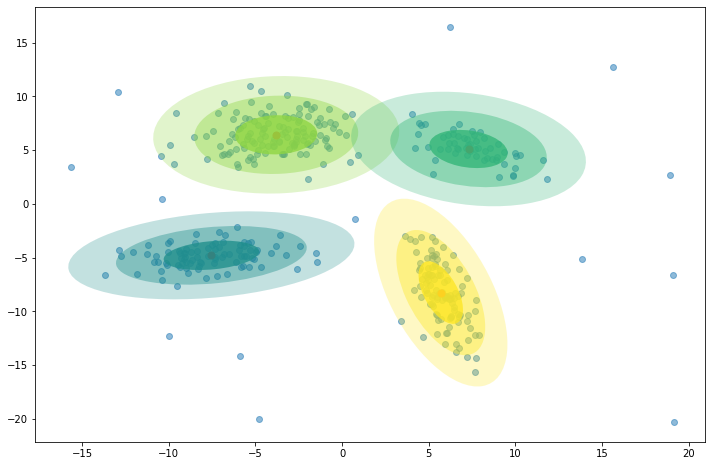

In [105]:
from sklearn.mixture import BayesianGaussianMixture
from dpgmmvi import draw_ellipse

# Train DPGMM
dpgmm = BayesianGaussianMixture(n_components=20, covariance_type="full", n_init=10, tol=1e-4, max_iter=500, weight_concentration_prior_type="dirichlet_process", verbose=0)
dpgmm.fit(data)

# estimated mean & precision matrices
MU = dpgmm.means_
INVCOV = dpgmm.precisions_

# sort cluster weights
weights_sorted = pd.Series(dpgmm.weights_).sort_values(ascending=False)
cluster_idx = weights_sorted[weights_sorted > 0.05].index

# vizualization
plt.figure(figsize=(12,8))
plt.scatter(data["0"], data["1"], alpha=0.5)
for idx in cluster_idx:
    cov = np.linalg.inv(INVCOV[idx])
    plt.scatter(MU[idx, 0], MU[idx, 1], c='red', s=50)
    cm = plt.cm.get_cmap('viridis_r', 7)
    draw_ellipse(MU[idx, :], cov, cm, idx)

Int64Index([251, 107, 387], dtype='int64')


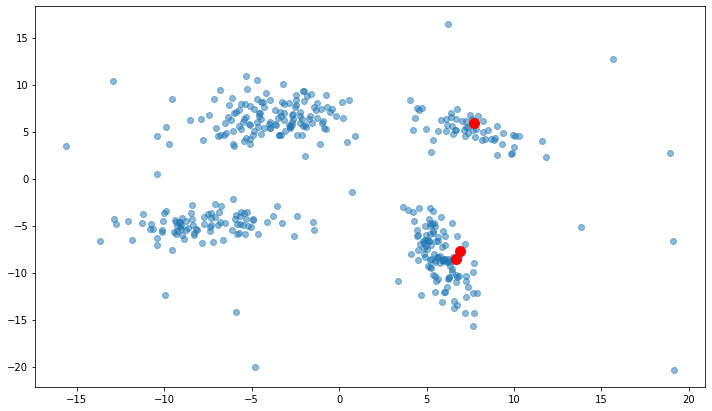

ValueError: Expected the input data X have 30 features, but got 2 features

In [266]:
example = data.sample(3)
print(example.index)
plt.figure(figsize=(12,7))
plt.scatter(data["0"], data["1"], alpha=0.5)
plt.scatter(example["0"], example["1"], s=100, c="red")
plt.show()
np.round(dpgmm.predict_proba(example), 3)

# 고차원 데이터셋

In [26]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer(as_frame=True)['data']
df_train = df.iloc[:-50]
df_test = df.tail(50)

print(df.shape)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [254]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
from dpgmmvi import draw_ellipse

# Train DPGMM
dpgmm = BayesianGaussianMixture(n_components=50, covariance_type="full", 
                                tol=1e-4, max_iter=500, n_init=10, 
                                weight_concentration_prior=1,
                                weight_concentration_prior_type="dirichlet_process", verbose=0)
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df)
dpgmm.fit(df)

# estimated mean & precision matrices
MU = dpgmm.means_
INVCOV = dpgmm.precisions_

# sort cluster weights
weights_sorted = pd.Series(dpgmm.weights_).sort_values(ascending=False)
cluster_idx = weights_sorted[weights_sorted > 0.05].index

In [255]:
y = load_breast_cancer(as_frame=True)["target"]
y.value_counts()  # 0: 양성

1    357
0    212
Name: target, dtype: int64

In [256]:
pd.Series(dpgmm.predict(df)).value_counts()

12    183
29     36
4      26
20     21
13     20
46     20
1      19
5      18
17     17
36     17
31     13
2      12
26     11
30     11
6      10
48      9
14      9
8       9
49      9
35      8
33      8
47      7
45      7
18      7
40      7
44      5
37      5
41      4
39      4
19      4
27      4
28      3
32      3
22      3
7       2
34      2
24      2
21      2
25      1
10      1
3       1
16      1
23      1
0       1
11      1
42      1
43      1
38      1
15      1
9       1
dtype: int64

In [258]:
anomaly_idx = pd.Series(dpgmm.predict(df)).value_counts()[pd.Series(dpgmm.predict(df)).value_counts() <= 10].index
anomaly_data = df.loc[anomaly_idx, :]
y[pd.Series(dpgmm.predict(df)).isin(anomaly_idx)].value_counts()

0    131
1     14
Name: target, dtype: int64